In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def moving_average(a, n=10):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n

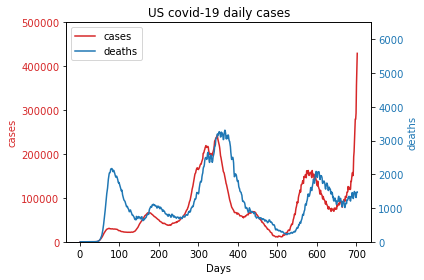

In [38]:
# Create some mock data
moving_index = 15
us_covid = pd.read_csv("rolling-averages/us.csv")
data1 = moving_average(us_covid["cases"].to_numpy(), moving_index)
data2 = moving_average(us_covid["deaths"].to_numpy(), moving_index)
t = range(1, len(data1)+1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('cases', color=color)
l1 = ax1.plot(t, data1, color=color, label="cases")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 0.5e6])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('deaths', color=color)  # we already handled the x-label with ax1
l2 = ax2.plot(t, data2, color=color, label="deaths")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 6500])
lns = l1+l2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc=0)

ax1.set_title("US covid-19 daily cases")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()